# Exploratory Data Analysis
## Number of images per age group

In [1]:
import histogram
import apply_algorithm


path = 'Images' # will be changed later once the dataset is ready
# age_histogram code goes here when ready

## Edge concentration per age group

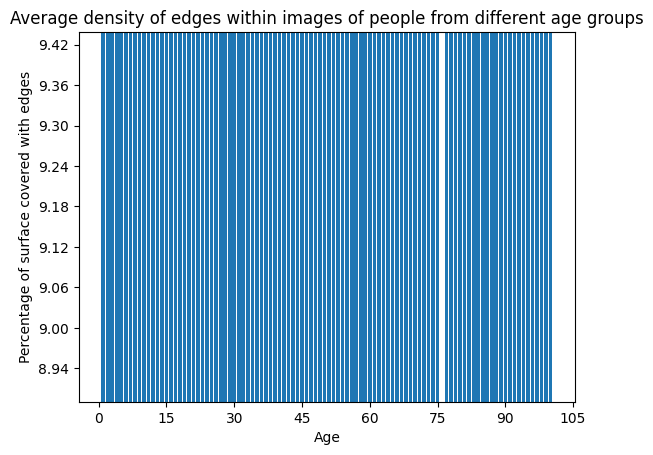

In [2]:
import os
import cv2
from PIL import Image
from numpy import asarray
import numpy


def wrinkles(path):
    if os.path.isdir(path):
        n = len(os.listdir(path))
        arr = [0] * n
        i = 0
        for file in os.listdir(path):
            temp = cv2.cvtColor(asarray(Image.open(os.path.join(path, file))), cv2.COLOR_BGR2GRAY)
            arr[i] = numpy.average(cv2.Canny(cv2.GaussianBlur(src=temp, ksize=(3, 5), sigmaX=0.5), 70, 135))
            i += 1
        return numpy.average(arr) * 100 / 255
    temp = cv2.cvtColor(asarray(Image.open(path)), cv2.COLOR_BGR2GRAY)
    return numpy.average(cv2.Canny(cv2.GaussianBlur(src=temp, ksize=(3, 5), sigmaX=0.5), 70, 135)) * 100 / 255

data = apply_algorithm.apply(wrinkles, path)
histogram.histogram(data, "Average density of edges within images of people from different age groups", 
                    "Age", "Percentage of surface covered with edges", "edge_histogram.jpg")

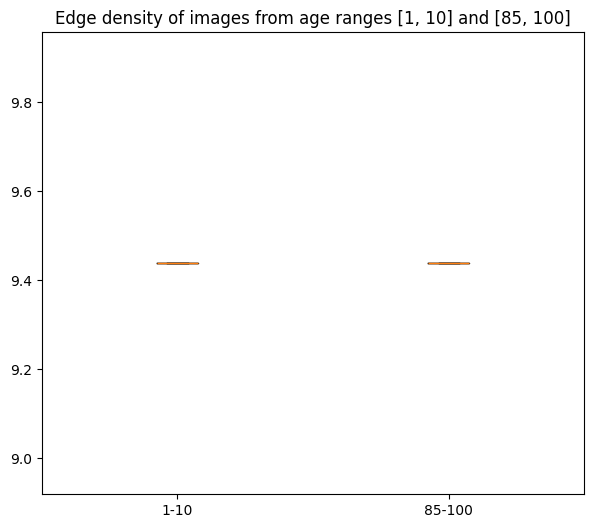

In [3]:
import box


data = apply_algorithm.boxplot_apply(wrinkles, path)
box.boxplot(data, "Edge density of images from age ranges [1, 10] and [85, 100]")

## Average pixel brightness

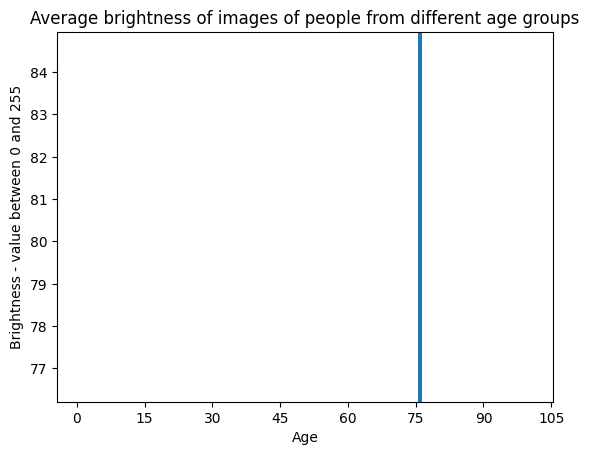

In [4]:
def average_pixel_color_and_brightness(path):
    def brightness(R,G,B):
        return 0.2126*R + 0.7152*G + 0.0722*B
    
    def single_image(path):
        image=cv2.imread(path)
        average_color_row = numpy.average(image, axis=0)
        average_color = numpy.average(average_color_row, axis=0)
        r=average_color[0]
        g=average_color[1]
        b=average_color[2]
        return [r, g, b]

    if os.path.isdir(path):
        files=os.listdir(path)
        n=len(files)
        average_red=[0]*n
        average_green=[0]*n
        average_blue=[0]*n
        average_brightness=[0]*n
        i=0
        for file in files:
            [r, g, b] = single_image(os.path.join(path, file))
            average_red[i]=r
            average_green[i]=g
            average_blue[i]=b
            average_brightness[i]=brightness(r,g,b)
            i=i+1
        red=numpy.average(average_red)
        green=numpy.average(average_green)
        blue=numpy.average(average_blue)
        brightness=numpy.average(average_brightness)
        return [[red,green,blue],brightness]
    [r, g, b] = single_image(path)
    return [[r, g, b], brightness(r,g,b)]
    


data = apply_algorithm.apply(average_pixel_color_and_brightness, path)
histogram.histogram([i[1] for i in data], "Average brightness of images of people from different age groups",
                    "Age", "Brightness - value between 0 and 255", "brightness_histogram.jpg")

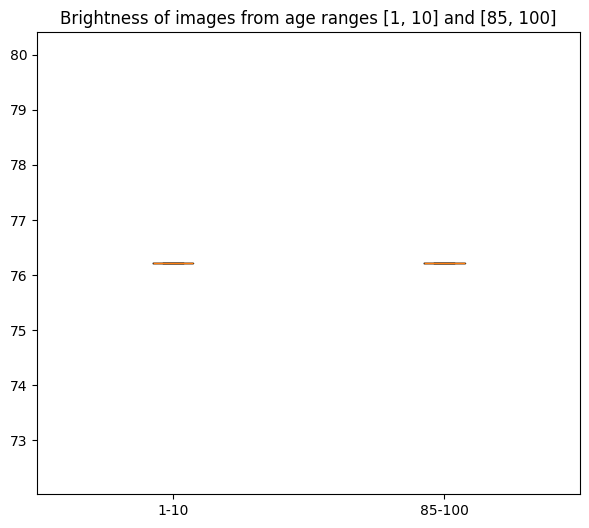

In [5]:
datab = apply_algorithm.boxplot_apply(average_pixel_color_and_brightness, path)
sub = []
for elem in datab:
    sub.append([i[1] for i in elem])
box.boxplot(sub, "Brightness of images from age ranges [1, 10] and [85, 100]")

## Average pixel color

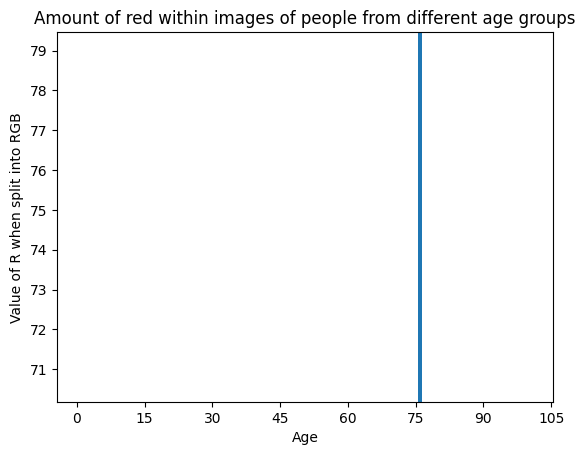

In [6]:
RGB = [i[0] for i in data]
histogram.histogram([i[0] for i in RGB], "Amount of red within images of people from different age groups",
                    "Age", "Value of R when split into RGB", "red_histogram.jpg")

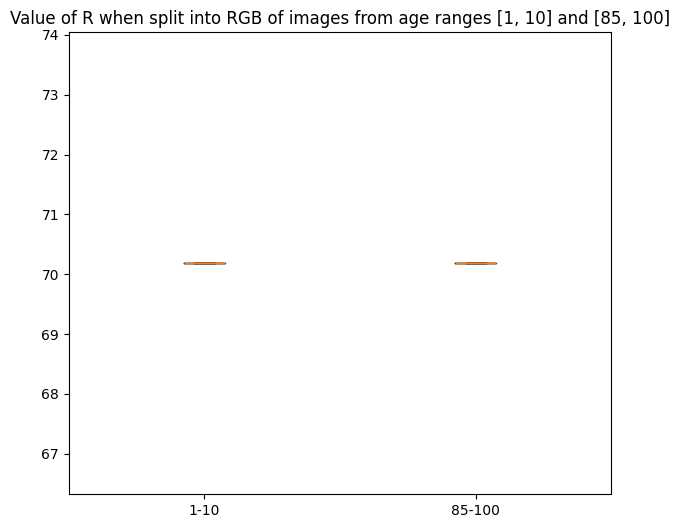

In [7]:
RGBb = []
for elem in datab:
    RGBb.append([i[0] for i in elem])
sub = []
for elem in RGBb:
    sub.append([i[0] for i in elem])
box.boxplot(sub, "Value of R when split into RGB of images from age ranges [1, 10] and [85, 100]")

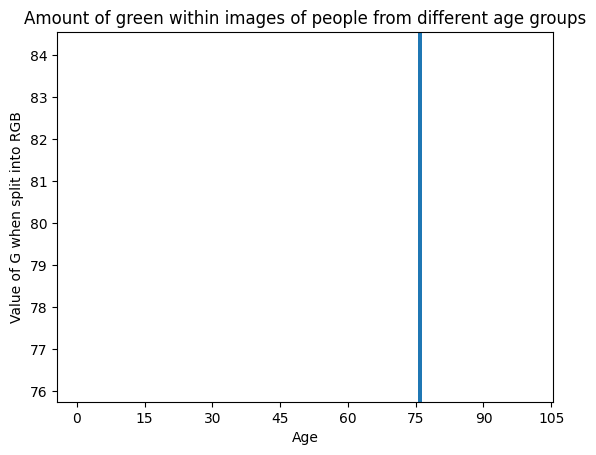

In [8]:
histogram.histogram([i[1] for i in RGB], "Amount of green within images of people from different age groups",
                    "Age", "Value of G when split into RGB", "green_histogram.jpg")

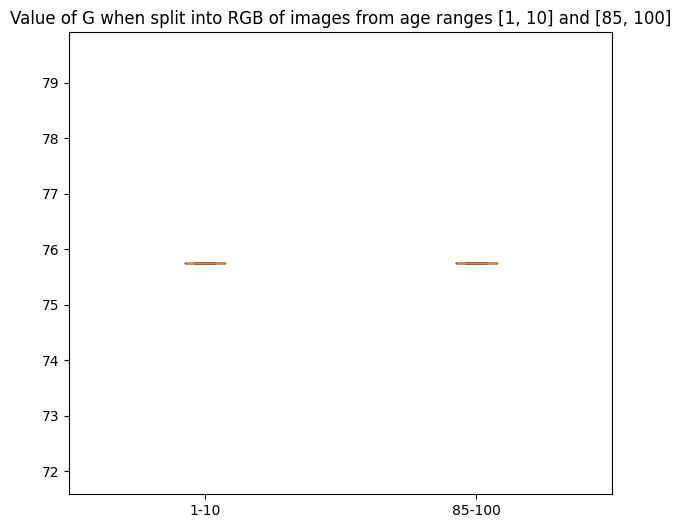

In [9]:
sub = []
for elem in RGBb:
    sub.append([i[1] for i in elem])
box.boxplot(sub, "Value of G when split into RGB of images from age ranges [1, 10] and [85, 100]")

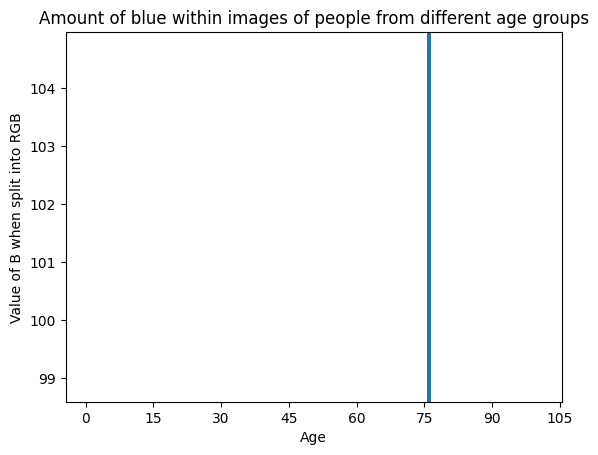

In [10]:
histogram.histogram([i[2] for i in RGB], "Amount of blue within images of people from different age groups", 
                    "Age", "Value of B when split into RGB", "blue_histogram.jpg")

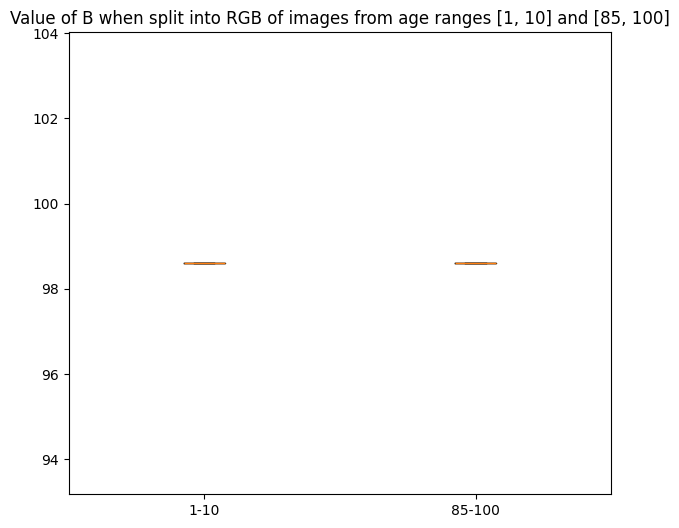

In [11]:
sub = []
for elem in RGBb:
    sub.append([i[2] for i in elem])
box.boxplot(sub, "Value of B when split into RGB of images from age ranges [1, 10] and [85, 100]")

In [ ]:
# combined colour graph goes here

## Contrast

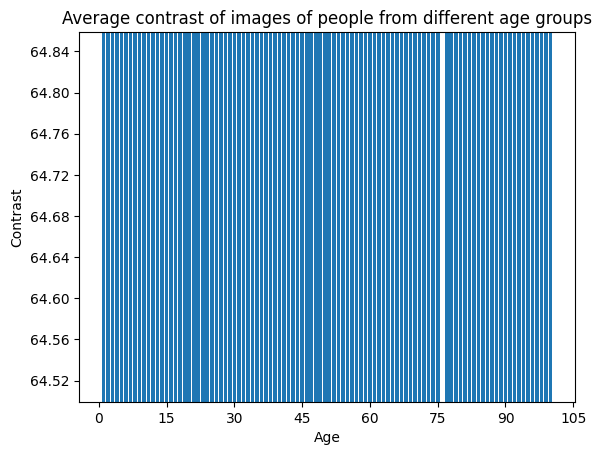

In [5]:
import wrapper


def contrast(img : numpy.array):
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_contrast = img_grey.std()
    return img_contrast


data = apply_algorithm.apply(wrapper.contrast, path)
histogram.histogram(data, "Average contrast of images of people from different age groups", 
                    "Age", "Contrast", "contrast_histogram.jpg")

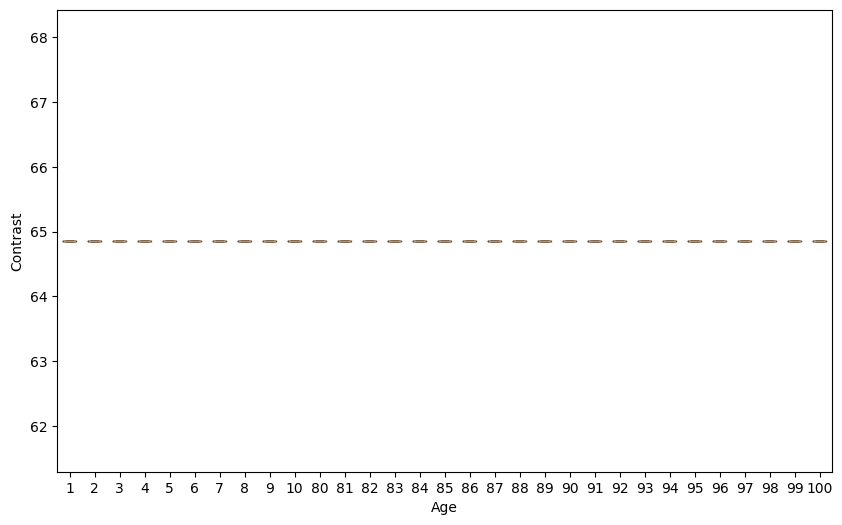

In [6]:
import matplotlib.pyplot as plt
from boxplot import boxplot


young_ages = list(range(1, 11))
old_ages = list(range(80, 101))

age_photos = {}

for ages in [young_ages, old_ages]:
    for age in ages:
        age_photos[age] = [plt.imread(os.path.join(path, str(age), x)) for x in os.listdir(os.path.join(path, str(age)))]

age_contrast = {}

for age in age_photos:
    age_contrast[age] = []
    for photo in age_photos[age]:
        img_contrast = contrast(photo)
        age_contrast[age].append(img_contrast)

x_box_1 = [age_contrast[key] for key in age_contrast]
labels_box_1 = young_ages + old_ages
boxplot(x_box_1, labels_box_1, 'Age', 'Contrast', figsize=(10,6))

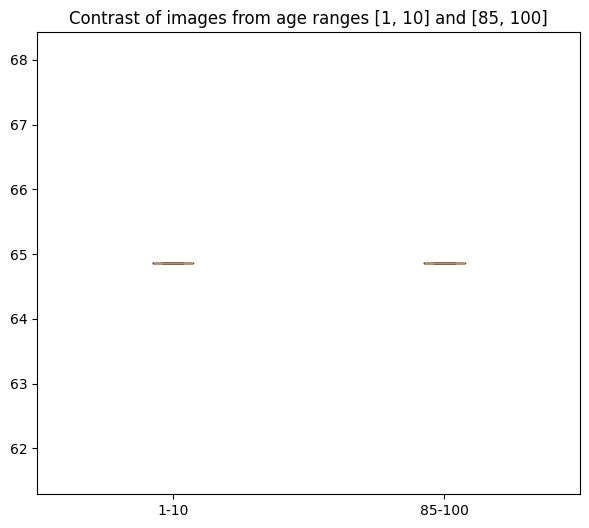

In [11]:
data = apply_algorithm.boxplot_apply(wrapper.contrast, path)
box.boxplot(data, "Contrast of images from age ranges [1, 10] and [85, 100]")

## Blackness

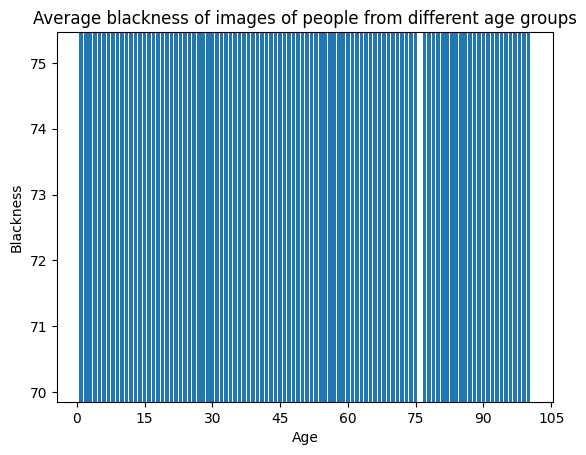

In [13]:
def blackness(img : numpy.array):
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(img_grey, 128, 255, 0)
    number_of_white_pix = numpy.sum(binary == 255)
    number_of_black_pix = numpy.sum(binary == 0)
    number_of_pix = number_of_white_pix + number_of_black_pix
    image_blackness = number_of_black_pix * 100 / number_of_pix
    return image_blackness


data = apply_algorithm.apply(wrapper.blackness, path)
histogram.histogram(data, "Average blackness of images of people from different age groups", 
                    "Age", "Blackness", "blackness_histogram.jpg")

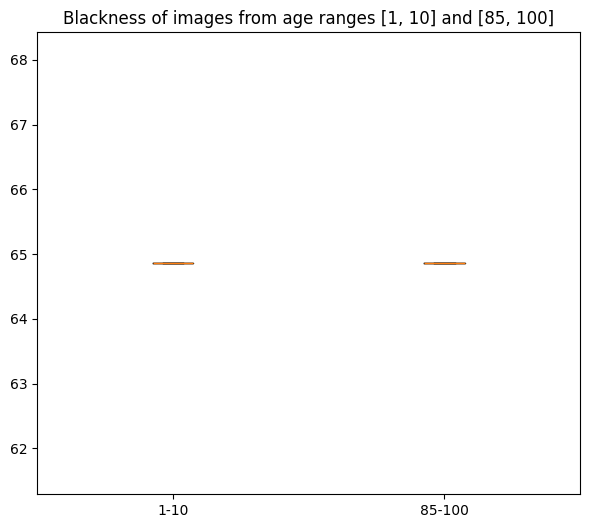

In [14]:
data = apply_algorithm.boxplot_apply(wrapper.contrast, path)
box.boxplot(data, "Blackness of images from age ranges [1, 10] and [85, 100]")

## Observations
### Average density of edges
- Shows a clear upwards trend for young ages 0-20. Afterwards the upwards trend deminishes significantly but it is still present.
- We can see that pictures of younger people have significantly less edges compared to the rest of the dataset

### Average pixel colors
- From all 4 graphs that analise the colors of the pictures the average color intensity tends to sharply decrease as people get older. This trend gets to its minimum around the age of 30. From there the trend increases but at a much slower rate compared to previous one. 
- Very high and very low color brightness in a picture might suggest that person to be around 0-10 years old or around 25-32 years old respectively.

### Contrast
- Observing contrasts of each picture groups does not show any discernible trend. However above the age of 90 each age group shows less outliers (appart from 95 but this may be due to small sample size)
- Analising picture's by contrast might not be the best tool to discern the age 